![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!


Average Charges by Age:
 age_group
Young           9036.789503
Adult          11551.332451
Middle-aged    14472.538841
Senior         18346.429730
Name: charges, dtype: float64


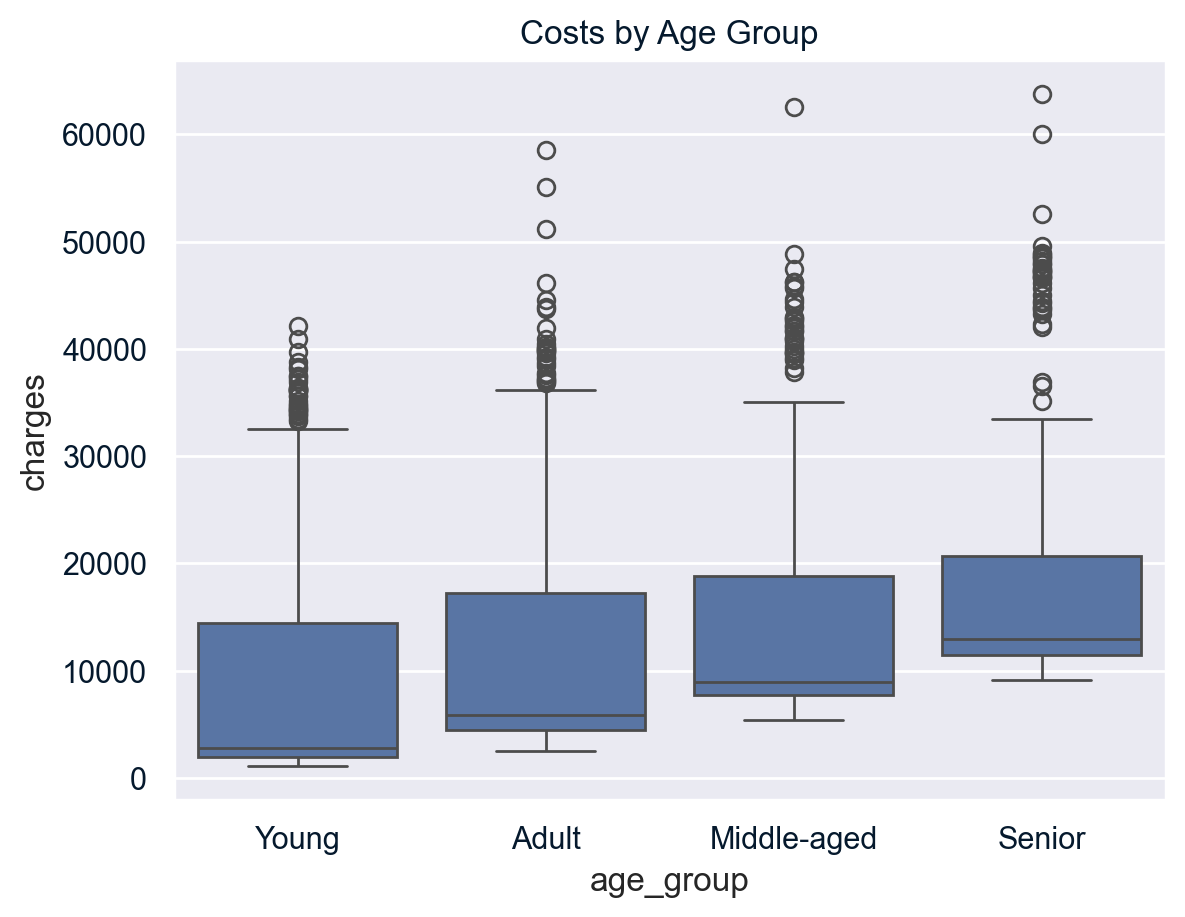


Average Charges by Sex:
 sex
0    13942.363290
1    12682.830454
Name: charges, dtype: float64


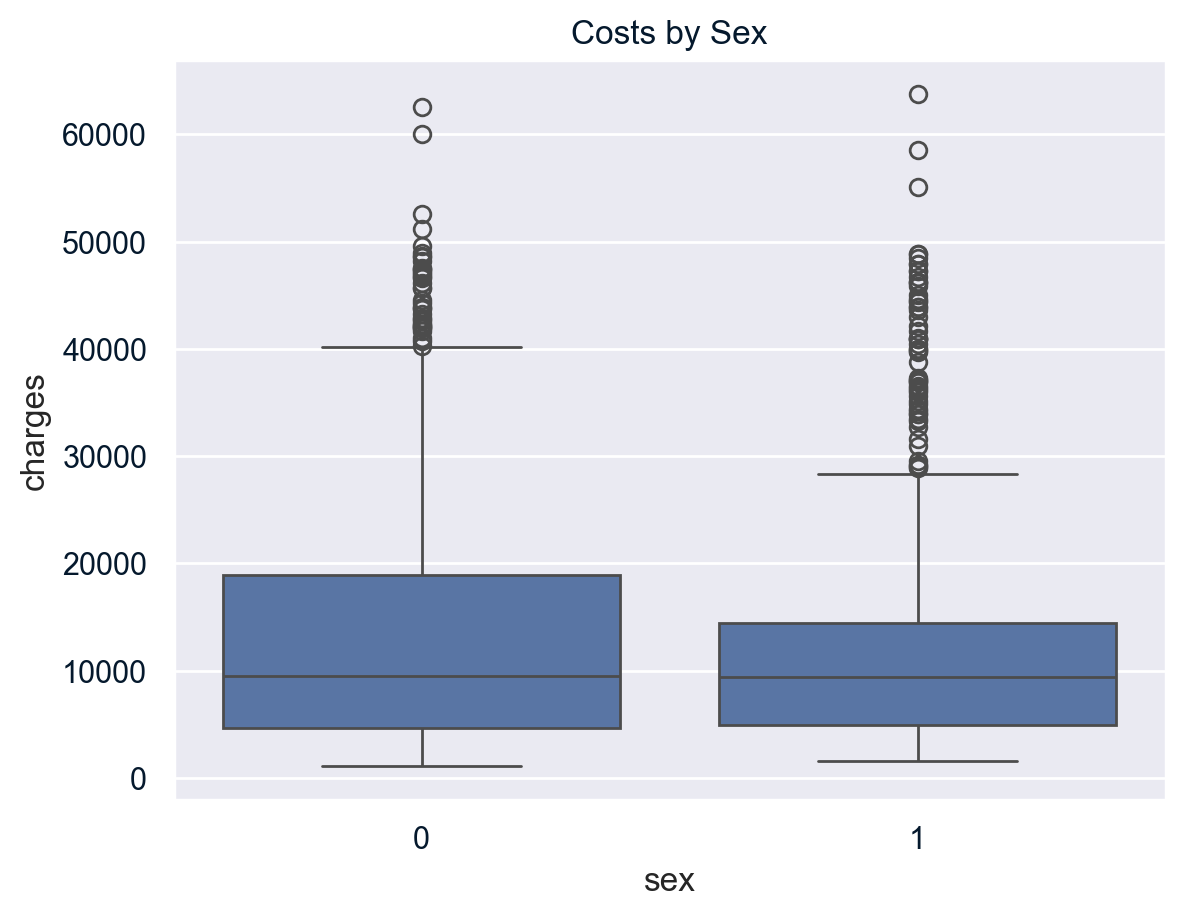


Average Charges by BMI:
 bmi_group
Low     10429.789556
Mid     13321.342900
High    16240.563990
Name: charges, dtype: float64


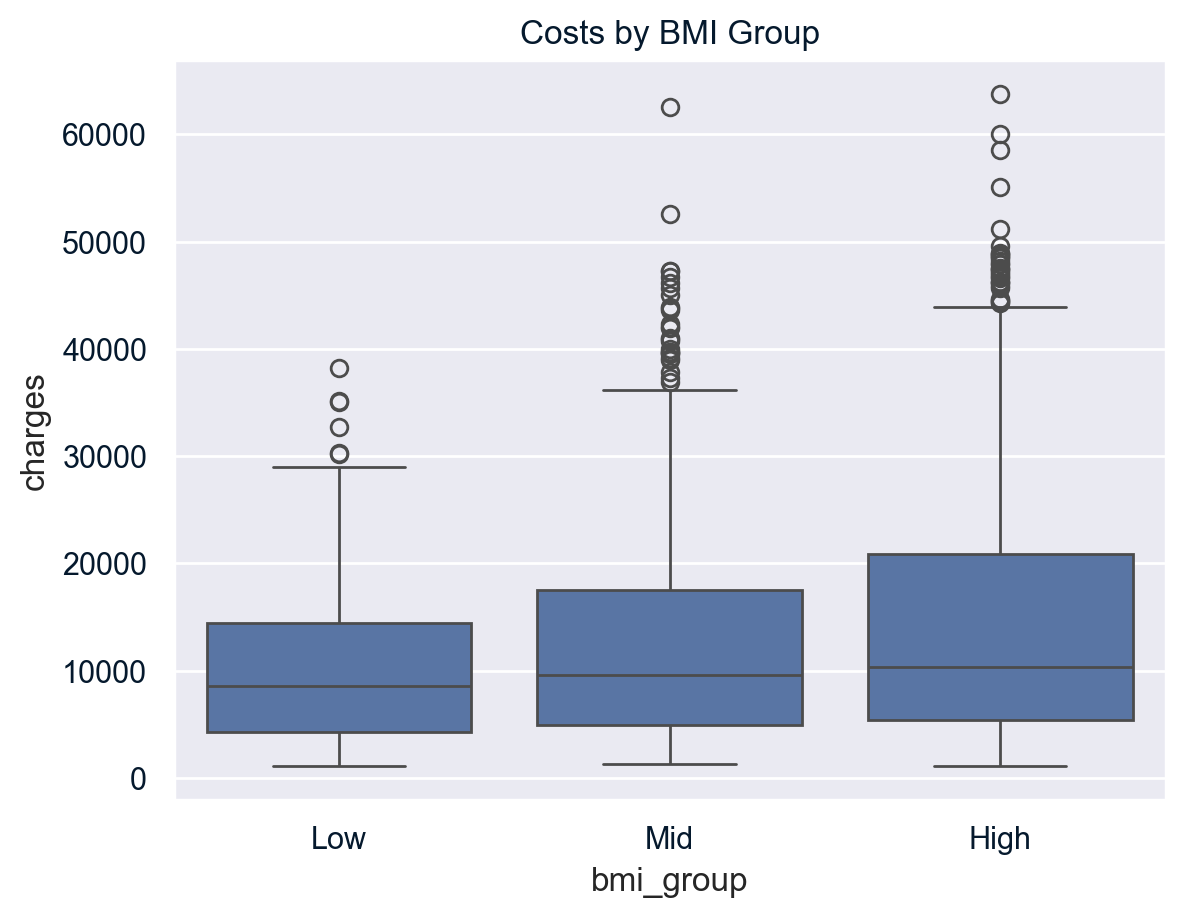

Average Charges by Children:
 children
0.0    12396.512068
1.0    12624.356130
2.0    15714.308333
3.0    15108.067101
4.0    13586.760435
5.0     9273.796250
Name: charges, dtype: float64


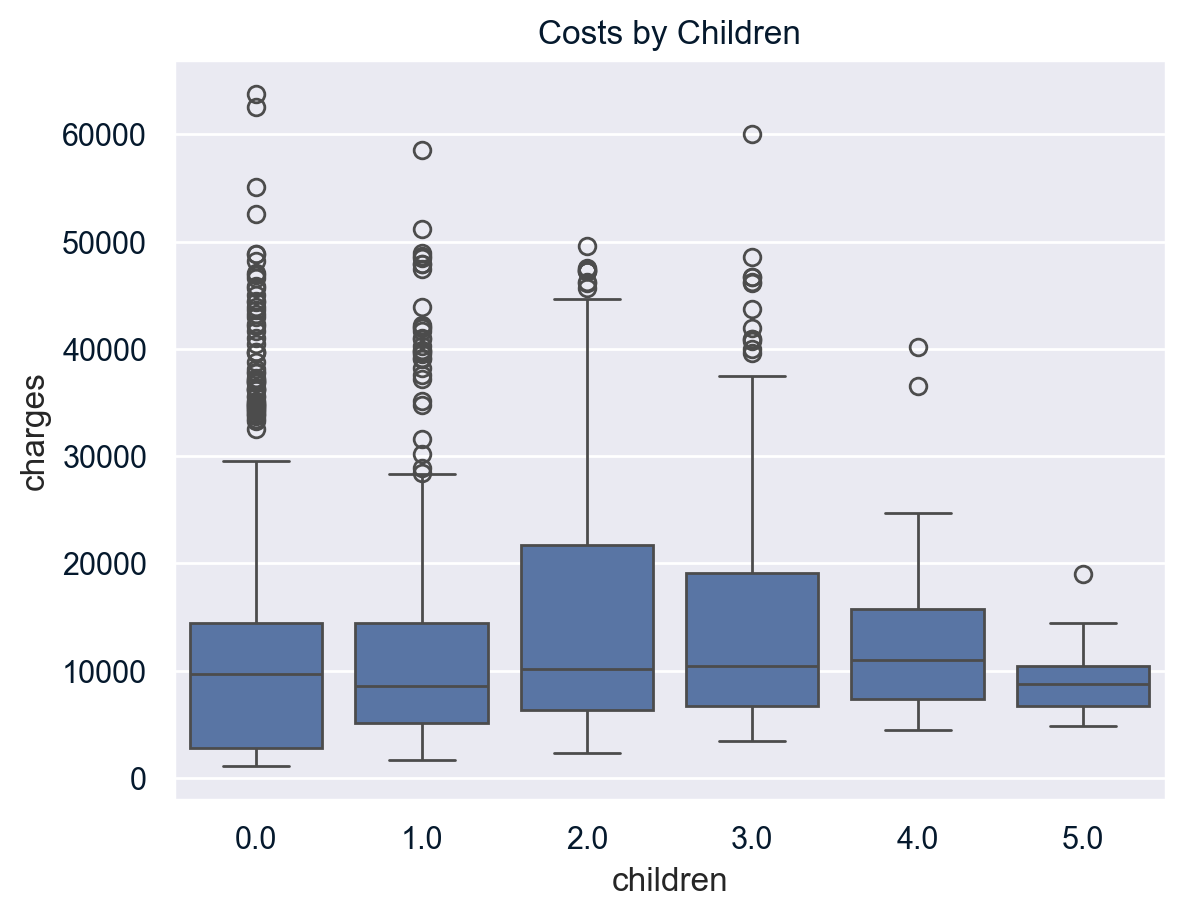


Average Charges by Smoking Status:
 smoker
0    32061.296653
1     8469.589269
Name: charges, dtype: float64


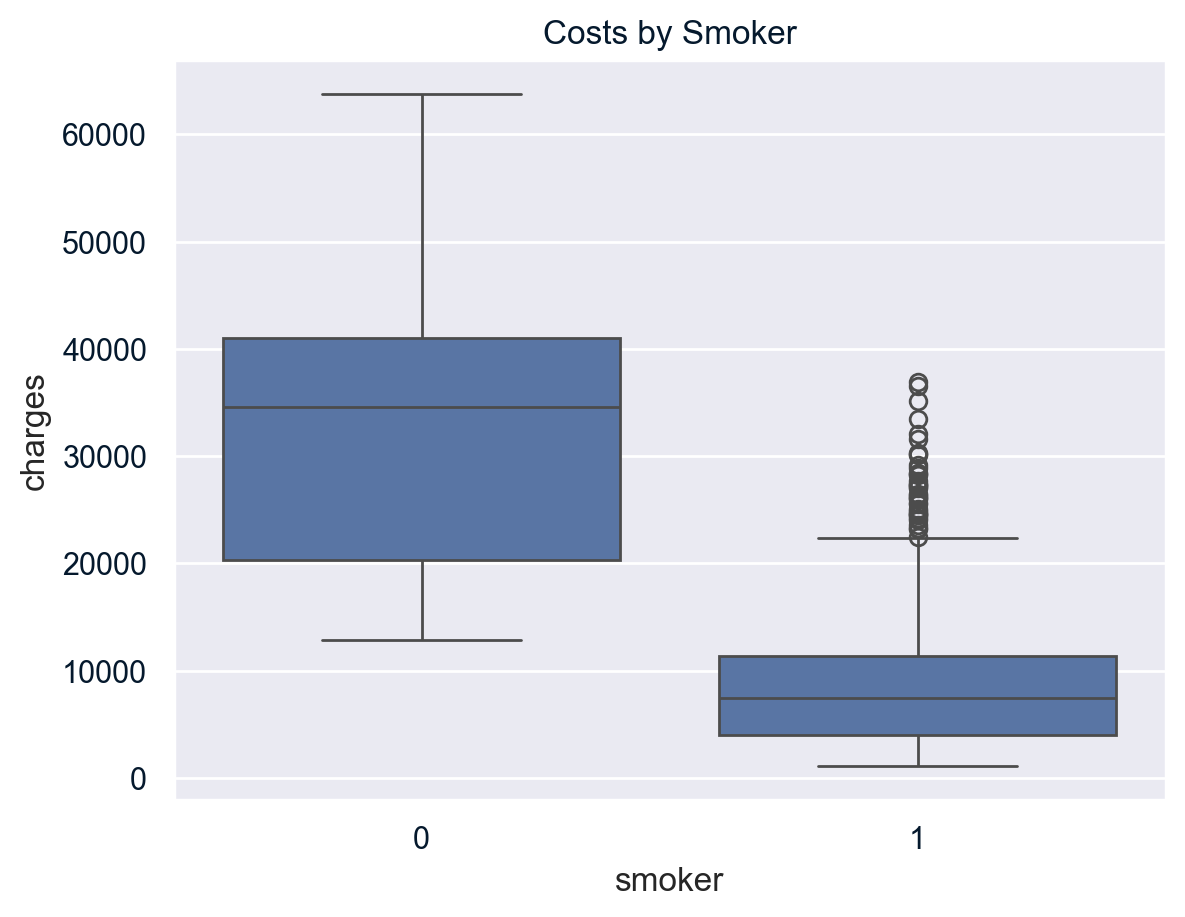

Average Charges by Region:
 region
1    14766.061869
3    13351.643898
0    12573.882020
2    12464.110307
Name: charges, dtype: float64


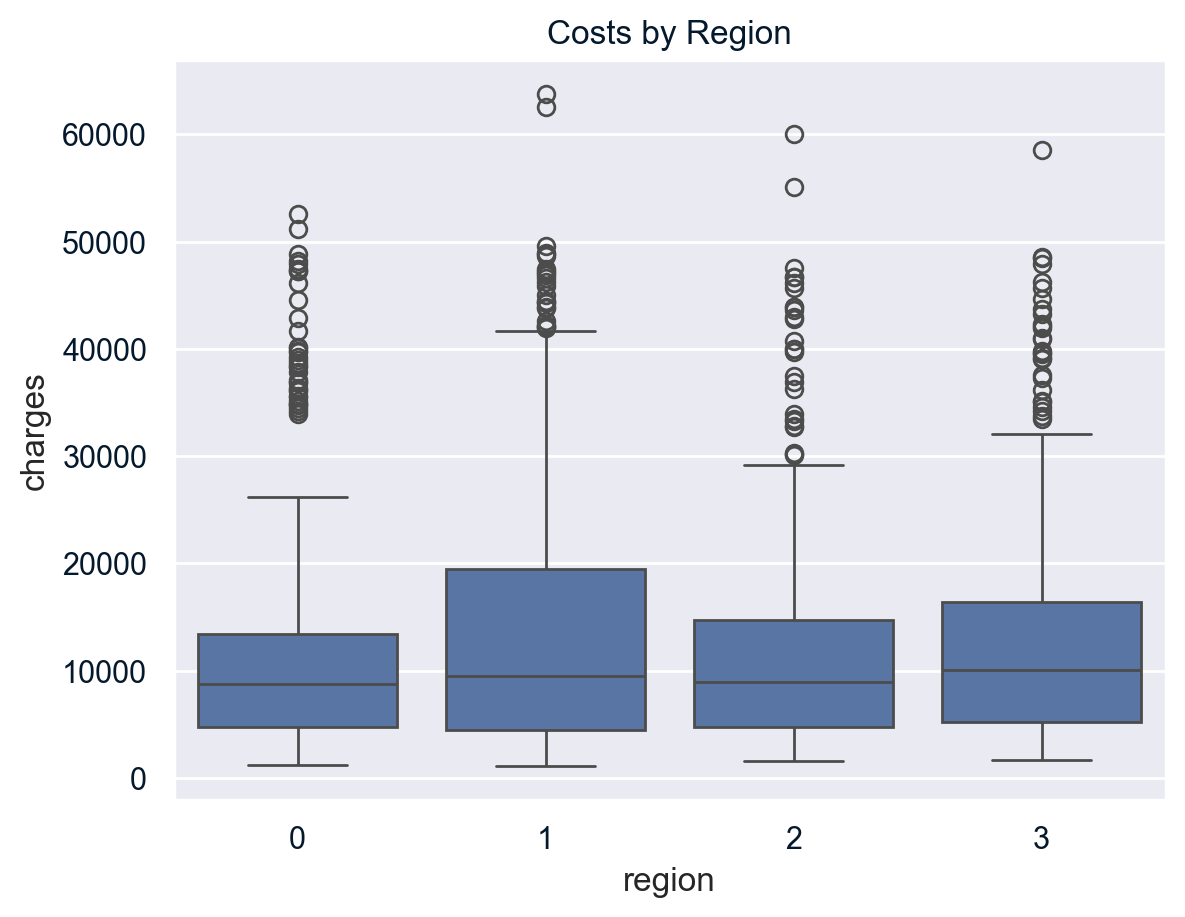

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1206 non-null   float64 
 1   sex        1206 non-null   int64   
 2   bmi        1206 non-null   float64 
 3   children   1206 non-null   float64 
 4   smoker     1206 non-null   int64   
 5   region     1206 non-null   int64   
 6   charges    1206 non-null   float64 
 7   age_group  1206 non-null   category
 8   bmi_group  1206 non-null   category
dtypes: category(2), float64(4), int64(3)
memory usage: 78.1 KB


,age,sex,bmi,children,smoker,region,charges
count,1.206000e+03,1206.000000,1.206000e+03,1206.000000,1206.000000,1206.000000,1206.000000
mean,-1.178346e-17,0.493367,-5.007971e-17,1.076285,0.794362,1.485904,13320.951982
std,1.000415e+00,0.500163,1.000415e+00,1.203378,0.404335,1.110217,12136.431567
min,-1.510889e+00,0.000000,-2.387918e+00,0.000000,0.000000,0.000000,1121.870000
25%,-9.242512e-01,0.000000,-7.171751e-01,0.000000,1.000000,1.000000,4753.885000
50%,-1.762949e-02,0.000000,-5.949864e-02,1.000000,1.000000,1.000000,9447.315000
75%,8.356615e-01,1.000000,6.545500e-01,2.000000,1.000000,2.000000,16584.320000
max,1.760060e+00,1.000000,3.685581e+00,5.000000,1.000000,3.000000,63770.430000


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load Data
insurance_data_path = 'insurance.csv'
df = pd.read_csv(insurance_data_path)
#df.info() # Get a summary of the DataFrame, including data types and non-null values
#df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns

# Review Data
#import seaborn as sns
#sns.boxplot(x=df['age'])
# Outlier detection using histogram
#import matplotlib.pyplot as plt
#plt.hist(df.age)
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram")
#plt.show()

# Clean Data
# -- Drop rows with any missing values
#print(df.isnull().sum())
df.dropna(inplace=True) 
#print(df.isnull().sum())
#df.info() # Get a summary of the DataFrame, including data types and non-null values
#df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns

# -- Clean Text / Object Data
df['sex'] = df['sex'].str.lower() # Convert to lowercase
df['smoker'] = df['smoker'].str.lower() # Convert to lowercase
df['region'] = df['region'].str.lower() # Convert to lowercase

# -- Convert Object Types to Numeric
#df['sex'].value_counts().plot(kind='bar')
#plt.title('Frequency of Categories (Matplotlib)')
#plt.xlabel('sex')
#plt.ylabel('Count')
#plt.show()
# Update sex for consistencym, woman, man, f
df['sex'] = df['sex'].replace({'m': 'male', 'man': 'male', 'f': 'female', 'woman': 'female'})
sex_mapping = {'male': 0, 'female': 1}
df['sex'] = df['sex'].replace(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
df['smoker'] = df['smoker'].replace(smoker_mapping)

region_mapping = {'southwest': 0, 'southeast': 1,'northwest': 2, 'northeast': 3}
df['region'] = df['region'].replace(region_mapping)

# -- Convert charges to Numeric
df['charges'] = df['charges'].str.replace('$', '', regex=True) # Remove special characters
df['charges'] = df['charges'].str.replace(' ', '', regex=True) # Remove special characters
df['charges'] = pd.to_numeric(df['charges'], errors='coerce') # 'coerce' turns invalid into NaN
df['charges'] = df['charges'].round(2)

# -- Fix Negative Values
df['children'] = df['children'].abs()
df['age'] = df['age'].abs()

# -- Handle Duplicates
df.drop_duplicates(inplace=True)

#print(df.isnull().sum())
df.dropna(inplace=True) 

# -- Scale Continous Data
continuous_cols = ['age', 'bmi']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# -- Final Data Review
#print(df.isnull().sum())
#df.info() # Get a summary of the DataFrame, including data types and non-null values
#df.head() # View the first few rows of the DataFrame
#df.describe() # Get descriptive statistics for numerical columns

# -- Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
# ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# Age - Ages: 18-64 Create: 4 equal-sized quantiles (e.g., 'Young', 'Adult', 'Middle-aged', 'Senior')
df['age_group'] = pd.qcut(df['age'], q=4, labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
avg_by_age = df.groupby('age_group')['charges'].mean()
print("\nAverage Charges by Age:\n", avg_by_age)
sns.boxplot(x='age_group', y='charges', data=df)
plt.title("Costs by Age Group")
plt.show()

# Compare Sex
avg_by_sex = df.groupby('sex')['charges'].mean()
print("\nAverage Charges by Sex:\n", avg_by_sex)
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Costs by Sex")
plt.show()

# BMI
df['bmi_group'] = pd.qcut(df['bmi'], q=3, labels=['Low', 'Mid', 'High'])
avg_by_bmi = df.groupby('bmi_group')['charges'].mean()
print("\nAverage Charges by BMI:\n", avg_by_bmi)
sns.boxplot(x='bmi_group', y='charges', data=df)
plt.title("Costs by BMI Group")
plt.show()

# Average predicted cost per number of children
avg_by_children = df.groupby('children')['charges'].mean()
print("Average Charges by Children:\n", avg_by_children)
sns.boxplot(x='children', y='charges', data=df)
plt.title("Costs by Children")
plt.show()

# Compare smokers vs non-smokers
avg_by_smoker = df.groupby('smoker')['charges'].mean()
print("\nAverage Charges by Smoking Status:\n", avg_by_smoker)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Costs by Smoker")
plt.show()

# Average predicted cost per region
avg_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("Average Charges by Region:\n", avg_by_region)
sns.boxplot(x='region', y='charges', data=df)
plt.title("Costs by Region")
plt.show()

df.info() # Get a summary of the DataFrame, including data types and non-null values
df.head() # View the first few rows of the DataFrame
df.describe() # Get descriptive statistics for numerical columns

Linear Regression
Root Mean Squared Error (RMSE): 5618.83
Mean Absolute Error (MAE): 3921.55
R²: 0.7768517868321778
Cross-Validation R²: 0.745

Random Forest Regressor
Root Mean Squared Error (RMSE): 4565.32
Mean Absolute Error (MAE): 2699.10
R²: 0.8526859468792318
Cross-Validation R²: 0.836

Gradient Boosting Regressor
Root Mean Squared Error (RMSE): 4136.93
Mean Absolute Error (MAE): 2369.29
R²: 0.8790356697465435
Cross-Validation R²: 0.853


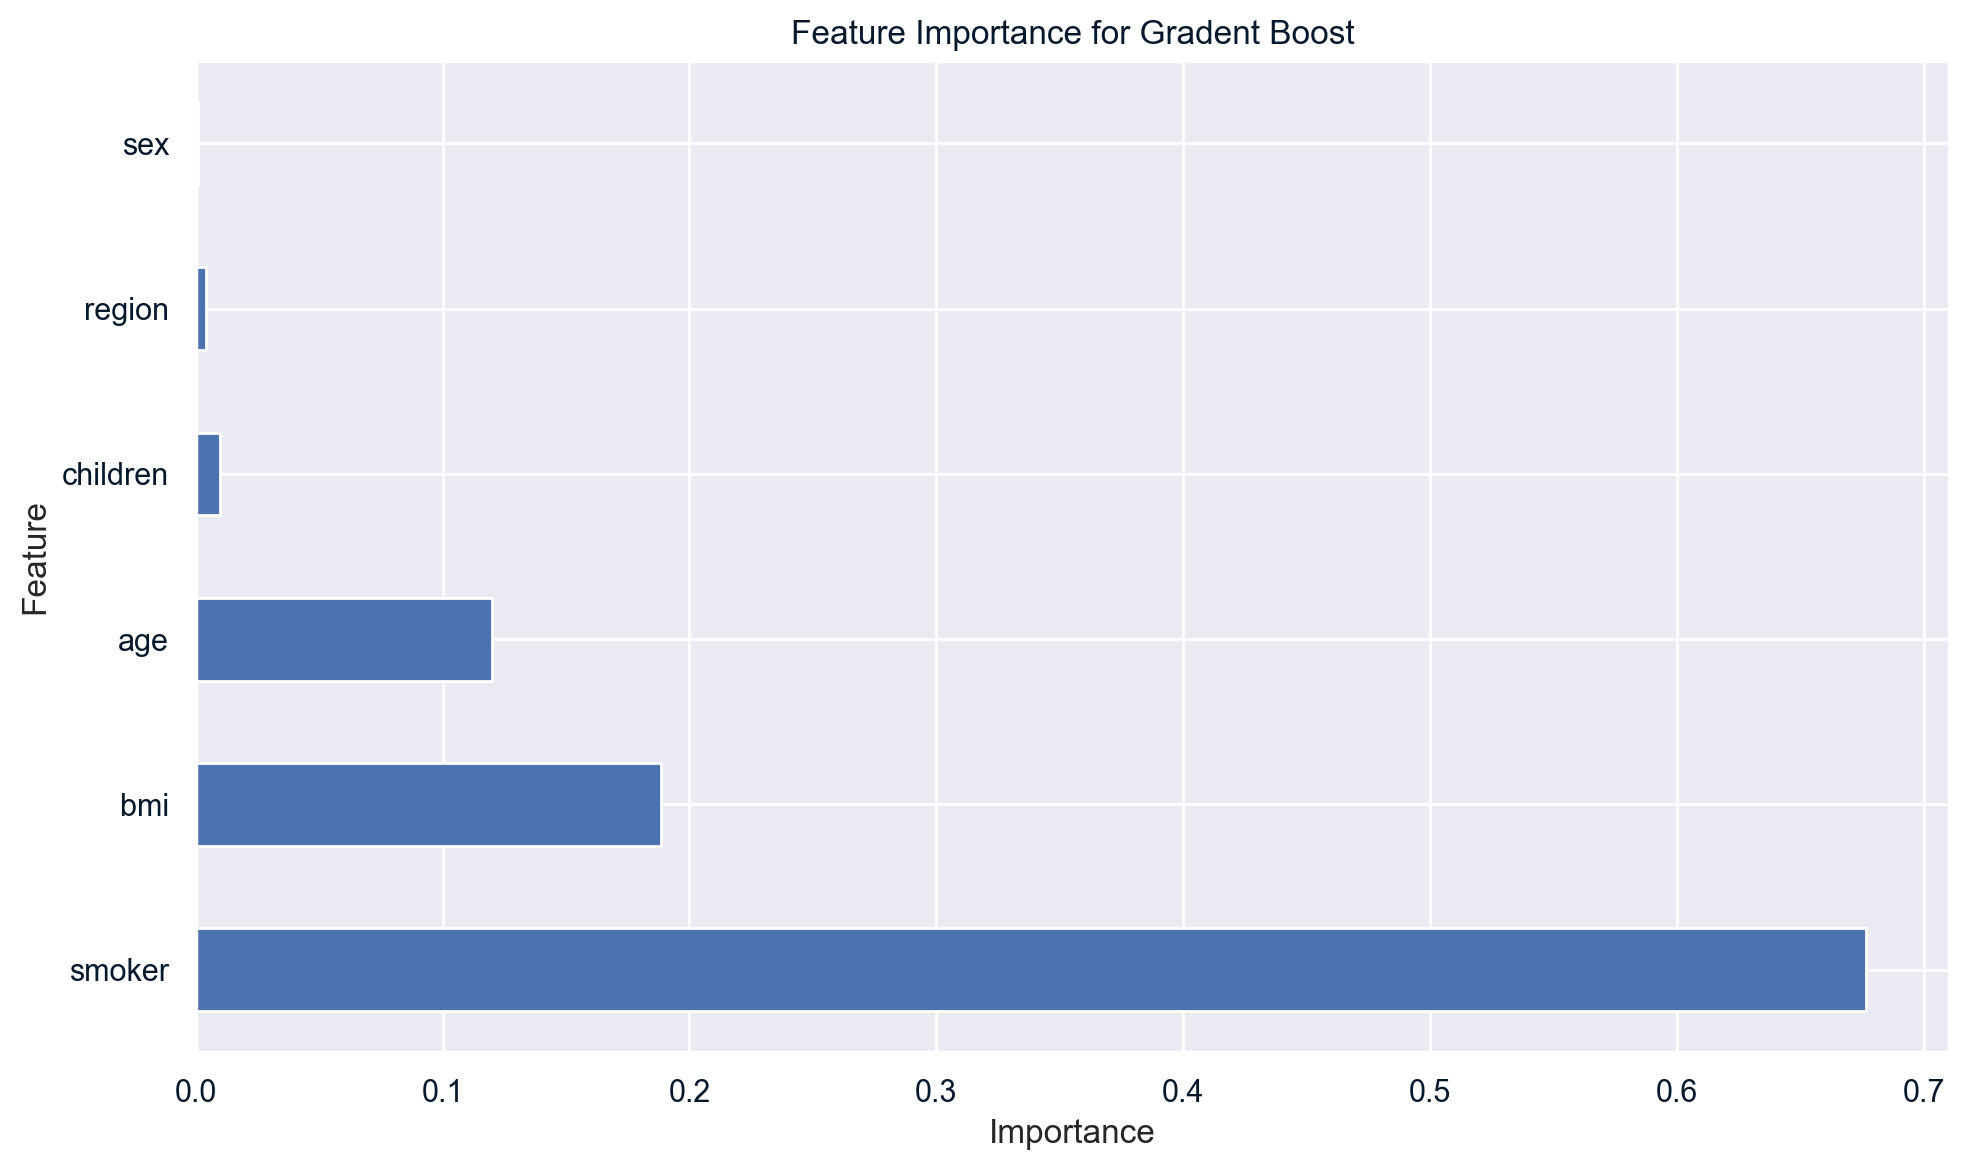

In [12]:
# Model Development
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
# Define independent and dependent variables
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression")
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# -- Make predictions
y_pred = model.predict(X_test)
# -- Evaluate the model
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²: {r2}") # Goal > 0.65
print(f"Cross-Validation R²: {cv_scores.mean():.3f}")

# Random Forest
print("\nRandom Forest Regressor")
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# -- Make predictions
y_pred = model.predict(X_test)
# -- Evaluate the model
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²: {r2}") # Goal > 0.65
print(f"Cross-Validation R²: {cv_scores.mean():.3f}")

# Gradient Boosting
print("\nGradient Boosting Regressor")
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
# -- Make predictions
y_pred = model.predict(X_test)
# -- Evaluate the model
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²: {r2}") # Goal > 0.65
print(f"Cross-Validation R²: {cv_scores.mean():.3f}")

# Get feature importances
importances = model.feature_importances_
# Create a pandas Series for easier plotting
feature_names = X.columns # If X is a DataFrame
feature_importance_series = pd.Series(importances, index=feature_names)
# Sort the features by importance
feature_importance_series = feature_importance_series.sort_values(ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importance for Gradient Boost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Validation of Unseen Data
validation_data_path = 'validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)

# Review Data
#print(validation_data.isnull().sum())
#validation_data.info() # Get a summary of the DataFrame, including data types and non-null values
#validation_data.head() # View the first few rows of the DataFrame
#validation_data.describe() # Get descriptive statistics for numerical columns

# Update sex for consistencym, woman, man, f
validation_data['sex'] = validation_data['sex'].replace({'m': 'male', 'man': 'male', 'f': 'female', 'woman': 'female'})
sex_mapping = {'male': 0, 'female': 1}
validation_data['sex'] = validation_data['sex'].replace(sex_mapping)
smoker_mapping = {'yes': 0, 'no': 1}
validation_data['smoker'] = validation_data['smoker'].replace(smoker_mapping)
region_mapping = {'southwest': 0, 'southeast': 1,'northwest': 2, 'northeast': 3}
validation_data['region'] = validation_data['region'].replace(region_mapping)

# Scale Data
validation_data[continuous_cols] = scaler.transform(validation_data[continuous_cols])

# Predict Using Best Model - Gradient Boosting 
validation_data['predicted_charges'] = model.predict(validation_data)
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

# -- Do not have actual charges for review, data is unseen in datacamp workbook